In [56]:
## Continue Data Processing ##

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
df = pd.read_csv('C:/Final_project/Final_project/analysis_file/cleaned_data.csv', index_col=0)

In [59]:
df.shape

(1359, 12)

In [60]:
df['quality'] = df['quality'].map({'Non-Quality': 0, 'Quality': 1, })

In [61]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [62]:
df['quality'].value_counts()

quality
1    719
0    640
Name: count, dtype: int64

In [63]:
df.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity',
                    'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar',
                    'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide',
                    'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)

In [64]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


Here, we take "quality" as the dependent variable and the other columns as independent variables. Since all these chemical variables must be present in the wine, I did not remove any features initially. Since we classify quality as good or bad, it is more appropriate to perform classification based on the situation.

After applying these models and evaluating their performance, I found:

Logistic Regression:
- Simple and reasonably fast.
- Useful when there is a linear classification problem in the dataset, and the relationships between features are believed to be linear.

Support Vector Classifier (SVC):
- Suitable for datasets with complex boundaries or high-dimensional feature spaces.
- SVM models generally generalize well.

Random Forest:
- Powerful for various feature types and high-dimensional datasets.
- Resistant to overfitting and automatically evaluates feature importance.

K-Nearest Neighbors (KNN):
- Useful for small datasets with close classes.
- However, performance issues may arise in high-dimensional datasets due to the curse of dimensionality.

Decision Trees:
- Useful for creating a simple and interpretable model.
- Can be combined with ensemble methods (e.g., Random Forest) to address the tendency for overfitting.


In [65]:
X = df.drop(['quality'], axis=1)  # bağımsız değişkenler 
y = df['quality']                 # bağımlı(hedef) değişken

# To improve the model's performance and reduce the impact of influential data, we should normalize our data.

In [66]:
# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Split train and test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1087, 11) (1087,)
Test set: (272, 11) (272,)


# Models

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Modelllerin karşılaştırılması ve değerlendirme metrikleri uygulanması
models = [logreg_model, svc_model, rf_model, knn_model, dt_model]
predictions = [logreg_predictions, svc_predictions, rf_predictions, knn_predictions, dt_predictions]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Decision Trees']

for model, preds, name in zip(models, predictions, model_names):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)
    
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")

Results for Logistic Regression:
Accuracy: 0.7647
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       124
           1       0.80      0.75      0.78       148

    accuracy                           0.76       272
   macro avg       0.76      0.77      0.76       272
weighted avg       0.77      0.76      0.77       272

Confusion Matrix:
 [[ 97  27]
 [ 37 111]]


Results for SVC:
Accuracy: 0.7831
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       124
           1       0.82      0.76      0.79       148

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.79      0.78      0.78       272

Confusion Matrix:
 [[100  24]
 [ 35 113]]


Results for Random Forest:
Accuracy: 0.7463
Classification Report:
               precision    recall  f1-score   support

   

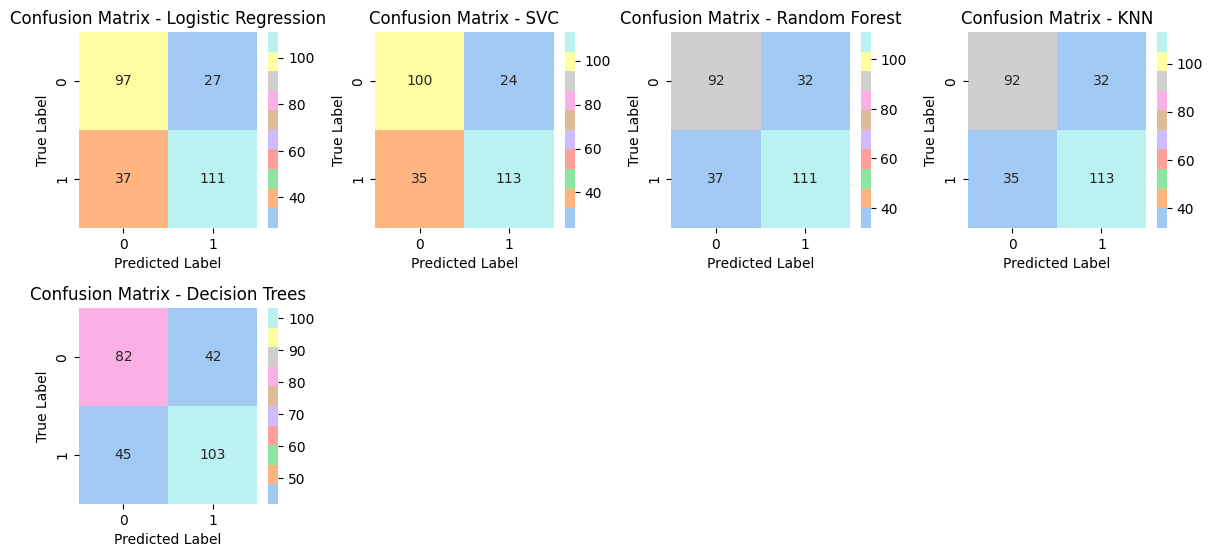

In [70]:
pastel_cmap = sns.color_palette("pastel", as_cmap=True)
confusion_matrices = []

# (model eğitimi ve tahminleri)

for preds, name in zip(predictions, model_names):
    matrix = confusion_matrix(y_test, preds)
    confusion_matrices.append((name, matrix))

# Her model için karışıklık matrisi ısı haritalarını çizelim
plt.figure(figsize=(12, 8))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(3, 4, i)
    plt.title(f'Confusion Matrix - {model_name}')
    sns.heatmap(cm, annot=True, fmt='d', cmap=pastel_cmap )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

The most successful model turned out to be the Support Vector Classifier.

When looking at the confusion matrix, the model correctly predicted 100 out of 124 low-quality wines and 113 out of 148 high-quality wines from the actual data. The accuracy value is also higher than the other models.

Now, we are creating a model between the quality variable and the alcohol variable, which we think has the most positive impact. As the result shows, although the performance of the SVC model has decreased, it is still the most successful model.

Overall, the performance of the other models has decreased.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = df['alcohol'].values.reshape(-1, 1)
y = df['quality'].values

# Veriyi train ve test setlere ayıralım
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturalım
logreg_model_alcohol = LogisticRegression()
logreg_model_alcohol.fit(X_train, y_train)
alcohol_predictions = logreg_model_alcohol.predict(X_test)
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Modelllerin karşılaştırılması ve değerlendirme metrikleri uygulanması
models = [logreg_model, svc_model, rf_model, knn_model, dt_model]
predictions = [logreg_predictions, svc_predictions, rf_predictions, knn_predictions, dt_predictions]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Decision Trees']

for model, preds, name in zip(models, predictions, model_names):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)
    
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")



Results for Logistic Regression:
Accuracy: 0.4963
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49       135
           1       0.50      0.50      0.50       137

    accuracy                           0.50       272
   macro avg       0.50      0.50      0.50       272
weighted avg       0.50      0.50      0.50       272

Confusion Matrix:
 [[66 69]
 [68 69]]


Results for SVC:
Accuracy: 0.7059
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       135
           1       0.69      0.75      0.72       137

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272

Confusion Matrix:
 [[ 89  46]
 [ 34 103]]


Results for Random Forest:
Accuracy: 0.6801
Classification Report:
               precision    recall  f1-score   support

       

In [72]:
svc_model=SVC(C=50,kernel="rbf")

svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.7102115915363385
Score the X-test  with Y-test  is :  0.7058823529411765
 Model Evaluation Decision Tree : accuracy score  0.7058823529411765
